# Data Workflow Lab 2

Proceed with your analysis of the Project 3 data set. You may need to compute new columns as you proceed. Fit one or more linear models to the data, investigate model fits and outliers, use regularization when appropriate.

### Learning objectives
- Perform exploratory analysis
- Generate correlation matrix of the features
- Generate linear regression models
- Evaluate model fit

If appropriate for your models and featuers:
- Use [feature selection](http://scikit-learn.org/stable/modules/feature_selection.html) to pick the best features
- Try different regularization options

In [1]:
% matplotlib inline

from collections import defaultdict
import datetime

from matplotlib import pyplot as plt
# Make the plots bigger
plt.rcParams['figure.figsize'] = 10, 10
import seaborn as sns

import numpy as np
import pandas as pd
from sklearn import linear_model

In [2]:
# Load the data from the previous lab
# If you changed the name you'll need to edit the next line
#sales = pd.read_csv("/Users/Rebecca/DSI-projects/projects/project-03/Iowa_Liquor_Sales_reduced.csv")

# Convert dates


//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
sales.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [4]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [89]:
len(sales)

2709546

In [18]:
#sales['Category Name'].value_counts()

In [6]:
len(sales['Category Name'].unique())

74

In [7]:
#sales['Category'].value_counts()

In [8]:
len(sales['Category'].unique())

90

In [9]:
sales['Bottle Volume (ml)'] = sales['Bottle Volume (ml)'].apply(lambda x: float(x)/1000)

In [10]:
## Put these deleted ones in a diff df?  Make dictionaries?
del sales['City']
del sales['County Number']
del sales['Category']
del sales['Volume Sold (Gallons)']
del sales['Item Description']
del sales['Category Name']

sales.rename(columns={'Bottle Volume (ml)':'volume'}, inplace=True)
sales.rename(columns={'Store Number':'store'}, inplace=True)
sales.rename(columns={'Date':'date'}, inplace=True)
sales.rename(columns={'Item Number':'itemID'}, inplace=True)
sales.rename(columns={'Zip Code':'zip'}, inplace=True)
sales.rename(columns={'State Bottle Cost':'cost'}, inplace=True)
sales.rename(columns={'State Bottle Retail':'retail'}, inplace=True)
sales.rename(columns={'Vendor Number':'vendorID'}, inplace=True)
sales.rename(columns={'County':'county'}, inplace=True)
sales.rename(columns={'Bottles Sold':'number_sold'}, inplace=True)
sales.rename(columns={'Sale (Dollars)':'dollars_sold'}, inplace=True)
sales.rename(columns={'Volume Sold (Liters)':'volume_sold'}, inplace=True)
#sales.head()

In [11]:
sales.head()

,date,store,zip,county,vendorID,itemID,volume,cost,retail,number_sold,dollars_sold,volume_sold
0,2016-03-31,5029,52806,Scott,370,87152,0.375,$9.99,$14.99,12,$179.88,4.5
1,2016-03-31,5029,52806,Scott,395,89197,1.000,$12.50,$18.75,2,$37.50,2.0
2,2016-03-31,4959,50613,Black Hawk,380,63959,1.750,$5.97,$8.96,6,$53.76,10.5
3,2016-03-31,2190,50314,Polk,205,40597,0.200,$2.24,$3.36,48,$161.28,9.6
4,2016-03-31,5240,52358,NaN,305,73055,0.750,$12.50,$18.75,6,$112.50,4.5


In [12]:
sales['volume'].unique()

array([  3.75000000e-01,   1.00000000e+00,   1.75000000e+00,
         2.00000000e-01,   7.50000000e-01,   5.00000000e-01,
         3.00000000e-01,   6.00000000e-01,   1.00000000e-01,
         1.20000000e+00,   3.00000000e+00,   6.03000000e-01,
         2.40000000e+00,   8.00000000e-01,   4.00000000e-01,
         6.00000000e+00,   1.12500000e+00,   4.80000000e+00,
         2.25000000e+00,   5.00000000e-02,   8.50000000e-01,
         1.89000000e+02,   2.25000000e+02,   1.50000000e-01,
         2.50000000e-01,   1.50000000e+00,   5.02000000e-01,
         3.60000000e+00,   9.00000000e-01,   4.50000000e+00,
         1.80000000e+02,   2.55000000e+00,   0.00000000e+00,
         9.50000000e-01])

In [13]:
sales['volume'].value_counts()

0.750      1227979
1.750       541448
1.000       367592
0.375       272113
0.500       121004
0.200        99426
0.600        32835
3.000        16294
0.300        13719
0.100         8553
0.800         2866
1.200         2832
2.400         1004
0.400          335
0.850          293
0.603          158
4.800          152
0.050          150
3.600          146
6.000          130
2.250           91
0.250           71
0.950           68
0.150           60
1.125           54
1.500           51
0.900           50
2.550           42
4.500           27
0.502            3
180.000          2
0.000            2
225.000          1
189.000          1
Name: volume, dtype: int64

In [25]:
sales['volume'] = sales['volume'].apply(lambda x: str(x))

In [26]:
sales['volume'] = sales['volume'].apply(lambda x: x.replace('0.603', '0.600'))
sales['volume'] = sales['volume'].apply(lambda x: x.replace('0.502', '0.500'))

In [27]:
sales['volume'] = sales['volume'].apply(lambda x: float(x))

In [28]:
sales['volume'].value_counts()

0.750      1227979
1.750       541448
1.000       367592
0.375       272113
0.500       121007
0.200        99426
0.600        32993
3.000        16294
0.300        13719
0.100         8553
0.800         2866
1.200         2832
2.400         1004
0.400          335
0.850          293
4.800          152
0.050          150
3.600          146
6.000          130
2.250           91
0.250           71
0.950           68
0.150           60
1.125           54
1.500           51
0.900           50
2.550           42
4.500           27
180.000          2
0.000            2
189.000          1
225.000          1
Name: volume, dtype: int64

In [34]:
sales = sales[sales.volume != 180.000]
sales = sales[sales.volume != 0.000]
sales = sales[sales.volume != 189.000]
sales = sales[sales.volume != 225.000]

In [68]:
#sales.sort_values('volume')

In [69]:
volumes = sales['volume'].unique()

In [73]:
volumes.sort()

In [79]:
zeros = [0] * 28

(-0.1, 0.1)

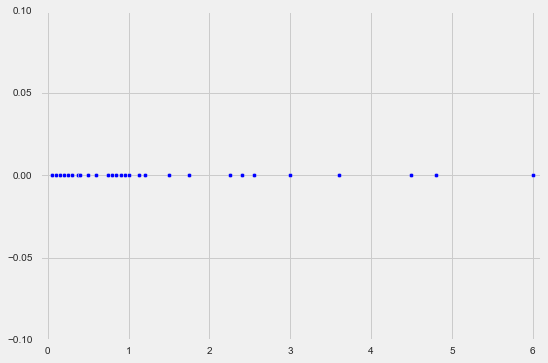

In [83]:
df_vol = pd.DataFrame(volumes)
plt.scatter(volumes, zeros)
plt.xlim([-0.1,6.1])
plt.ylim([-0.1,0.1])

In [88]:
df_sales = sales[sales['volume'] > 2]
df_sales['volume'].value_counts()

3.00    16294
2.40     1004
4.80      152
3.60      146
6.00      130
2.25       91
2.55       42
4.50       27
Name: volume, dtype: int64

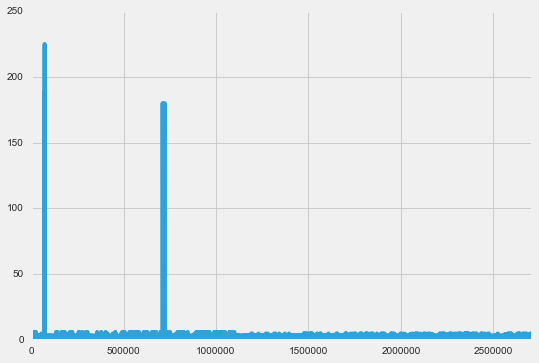

In [33]:
## x-axis is quantity at that volume
## y-axis is volume
sales['volume'].plot()

In [ ]:
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

df_hist = plt.plot(sales['volume'], color = 'darkred', bins = 20)

plt.title('Histogram of Peak Chart Position', fontsize = 24)

# y label
plt.ylabel('Frequency')

# x label
plt.xlabel('Peak Position')

plt.show()

In [ ]:
drop_genre = ['Pop', 'Latin', 'Electronica', 'Reggae', 'Jazz', 'Gospel']
for genre in drop_genre:
    df = df[df.genre != genre]

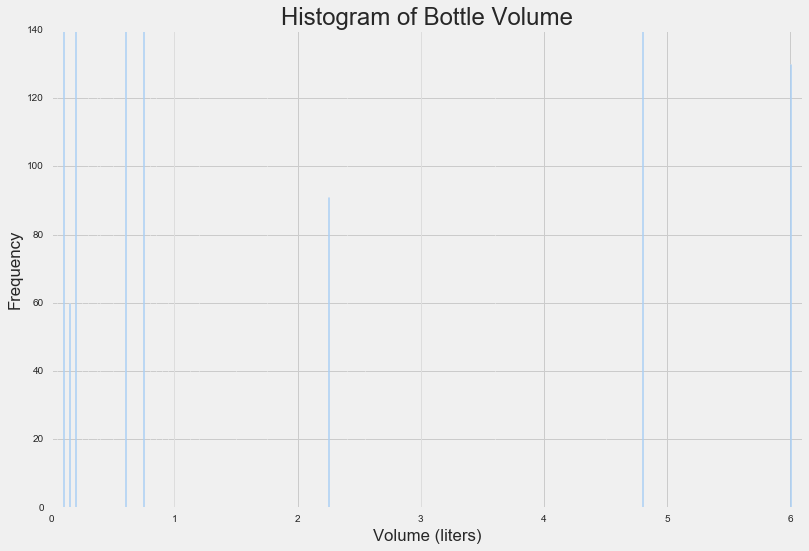

In [16]:
## Plot a histogram of peak chart position 
plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

vol_hist = plt.hist(sales['volume'], color = 'dodgerblue', bins = 100000)

plt.title('Histogram of Bottle Volume', fontsize = 24)

# y label
plt.ylabel('Frequency')

# x label
plt.xlabel('Volume (liters)')

plt.xlim([0, 6.1])
plt.ylim([0, 140])

plt.show()

In [40]:
## Change dollar-value columns to floats
sales['cost'] = sales['cost'].apply(lambda x: float(x.replace('$', '')))
sales['retail'] = sales['retail'].apply(lambda x: float(x.replace('$', '')))
sales['dollars_sold'] = sales['dollars_sold'].apply(lambda x: float(x.replace('$', '')))

In [41]:
sales.head()

,date,store,Zip Code,county,Category Name,vendorID,Item Number,Item Description,volume,cost,retail,number_sold,dollars_sold,volume_sold
0,2016-03-31,5029,52806,Scott,TEQUILA,370,87152,Avion Silver,0.0,9.99,14.99,12,179.88,4.5
1,2016-03-31,5029,52806,Scott,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1.0,12.50,18.75,2,37.50,2.0
2,2016-03-31,4959,50613,Black Hawk,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1.0,5.97,8.96,6,53.76,10.5
3,2016-03-31,2190,50314,Polk,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,0.0,2.24,3.36,48,161.28,9.6
4,2016-03-31,5240,52358,NaN,CREAM LIQUEURS,305,73055,Rumchata,0.0,12.50,18.75,6,112.50,4.5


In [43]:
sales['markup'] = [sales['retail'][i] - sales['cost'][i] for i in range(len(sales))]

In [45]:
sales['total_profit'] = [sales['markup'][i]*sales['number_sold'][i] for i in range(len(sales))]

In [46]:
sales.head()

,date,store,Zip Code,county,Category Name,vendorID,Item Number,Item Description,volume,cost,retail,number_sold,dollars_sold,volume_sold,markup,total_profit
0,2016-03-31,5029,52806,Scott,TEQUILA,370,87152,Avion Silver,0.0,9.99,14.99,12,179.88,4.5,5.00,60.00
1,2016-03-31,5029,52806,Scott,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1.0,12.50,18.75,2,37.50,2.0,6.25,12.50
2,2016-03-31,4959,50613,Black Hawk,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1.0,5.97,8.96,6,53.76,10.5,2.99,17.94
3,2016-03-31,2190,50314,Polk,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,0.0,2.24,3.36,48,161.28,9.6,1.12,53.76
4,2016-03-31,5240,52358,NaN,CREAM LIQUEURS,305,73055,Rumchata,0.0,12.50,18.75,6,112.50,4.5,6.25,37.50


## Exploratory Analysis
Make some plots, look at correlations, etc.

In [ ]:
# Compute correlations


In [ ]:
# Perform some exploratory analysis, make a few plots

In [ ]:
# Fit a linear model

# Plot the data and the best fit line

# Compute the model fit


In [ ]:
# Predict Total 2016 sales, compare to 2015


In [ ]:
# Try per zip code or city to get better resolution



In [ ]:
# Filter out stores that opened or closed throughout the year
# If this wasn't done already


In [ ]:
# Fit another model

# Compute the model fit


In [ ]:
# Predict Total 2016 sales, compare to 2015
